# Projekt: Rozpoznanie Liter

## Autor: Duy Vu Thanh, Oskar Paciorkowski

### 1. Źródło Danych
Dane użyte w projekcie pochodzą z [bazy danych UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/letter+recognition). Zbiór danych zawiera litery alfabetu angielskiego napisane w dwudziestu różnych czcionkach. Litery są reprezentowane jako mapy pikseli czarno-białych, z losowymi deformacjami. Po przekształceniu, litery są opisane za pomocą 16 atrybutów numerycznych o wartościach od 0 do 15. Zbiór danych zawiera 20 000 przykładów.

### 2. Opis Zadania
Celem badania jest stworzenie klasyfikatora zdolnego do rozpoznawania liter na podstawie dostarczonych danych. Zbiór treningowy składa się z 16 000 pierwszych liter, a zbiór testowy z 4 000 pozostałych liter.

### 3. Metoda i Implementacja
a) **Normalizacja Atrybutów:** Wartości atrybutów zostaną znormalizowane, aby doprowadzić je do zakresu (0,1).

b) **Wybór Klasyfikatorów:**
   - k-NN (k-najbliższych sąsiadów)
   - Sieć Neuronowa

c) **Testowanie Skuteczności:**
   - Skuteczność każdego z wybranych klasyfikatorów będzie testowana, a ich trafności w klasyfikacji liter będą porównywane.

### 4. Model Testowania
   - **Zbiór Treningowy:** Pierwsze 16 000 liter (wierszy) w pliku 'letter-recognition.data'.
   - **Zbiór Testowy:** Pozostałe 4 000 liter w tym samym pliku.

### 5. Miara Oceny
Miara oceny skuteczności klasyfikacji będzie oparta na trafności (accuracy) klasyfikatora na zbiorze testowym. 

Projekt ma na celu opracowanie efektywnego systemu rozpoznawania liter z wykorzystaniem różnych klasyfikatorów i ocenę ich skuteczności w kontekście klasyfikacji liter alfabetu angielskiego.


In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [30]:
column_names = ['class'] + [f"attr{n}" for n in range(1, 17)]
data_set = pd.read_csv('data_sets/letter-recognition.data', header=None, names=column_names)

upper_limit = data_set.shape[1]

#column_names = ['class'] + [f"attr{n}" for n in range(1, 17)]

print(data_set.shape)
data_set.head(10)

(20000, 17)


,class,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [33]:
#normalizacja danych
class_column = data_set['class']
attributes = data_set.drop(columns=['class'])

scaler = MinMaxScaler()
normalized_attributes = pd.DataFrame(scaler.fit_transform(attributes), columns=attributes.columns)

normalized_df = pd.concat([class_column, normalized_attributes], axis=1)

print(normalized_df.head(10))

Index(['class', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7',
       'attr8', 'attr9', 'attr10', 'attr11', 'attr12', 'attr13', 'attr14',
       'attr15', 'attr16'],
      dtype='object')
  class     attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
0     T  0.133333  0.533333  0.200000  0.333333  0.066667  0.533333  0.866667   
1     I  0.333333  0.800000  0.200000  0.466667  0.133333  0.666667  0.333333   
2     D  0.266667  0.733333  0.400000  0.533333  0.400000  0.666667  0.400000   
3     N  0.466667  0.733333  0.400000  0.400000  0.200000  0.333333  0.600000   
4     G  0.133333  0.066667  0.200000  0.066667  0.066667  0.533333  0.400000   
5     S  0.266667  0.733333  0.333333  0.533333  0.200000  0.533333  0.533333   
6     B  0.266667  0.133333  0.333333  0.266667  0.266667  0.533333  0.466667   
7     A  0.066667  0.066667  0.200000  0.133333  0.066667  0.533333  0.133333   
8     J  0.133333  0.133333  0.266667  0.266667  0.133333  0.666667

In [34]:
class_freq = (data_set.groupby('class').size())
print (type(class_freq))
print(class_freq)

<class 'pandas.core.series.Series'>
class
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


In [35]:
# Podzielenie na zbiory treningowe i testowe
train, test = train_test_split(normalized_df, test_size=0.2, random_state=50, shuffle=True)

# Tworzenie atrybutow docelowych.

X_train = train.iloc[:, 1:] 
y_train = train.iloc[:, 0] 
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0] 

print(X_train.shape)
print(X_test.shape)

(16000, 16)
(4000, 16)


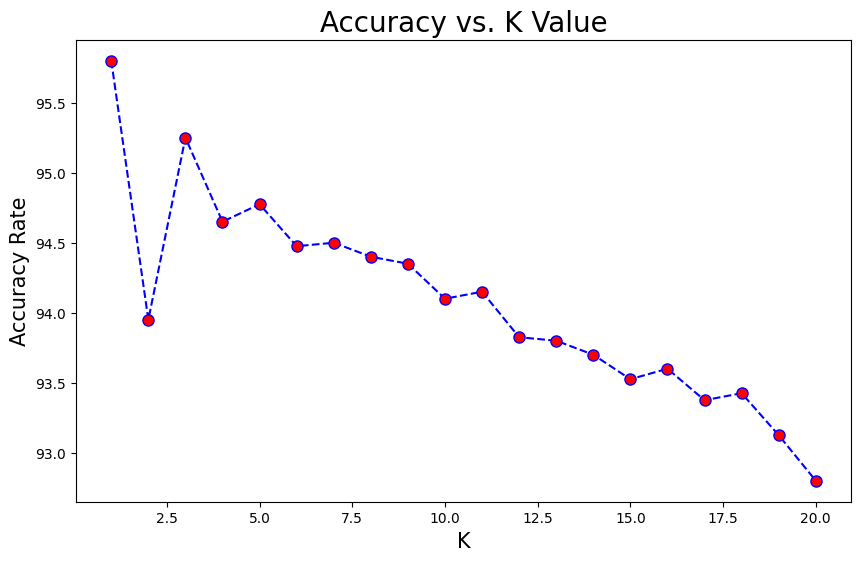

In [36]:
#KNN
acc_rate = []
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc_rate.append(accuracy_score(y_test, pred_i) * 100)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), acc_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Accuracy vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=15)
plt.ylabel('Accuracy Rate', fontsize=15)
plt.show()

In [ ]:
#Neural Network
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)



mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, y_train)
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.96


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, y_train)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.97


In [ ]:
#lepiej nie odpalic gridSearch poniewaz zajmuje to z 15 min.